In [2]:
import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

2024-03-04 13:25:15.019548: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# cov/cor functions

def X(T, kx, sigx):
    return sigx*(1 - np.exp(-kx*T))/(kx*T)

def cov(Ti, Tj, kx, sigx, ky, sigy, rho):
    xti = X(Ti, kx, sigx)
    xtj = X(Tj, kx, sigx)
    yti = X(Ti, ky, sigy)
    ytj = X(Tj, ky, sigy)
    return xti*xtj + yti*ytj + rho*(xti*ytj + xtj*yti)

def cor(Ti, Tj, kx, sigx, ky, sigy, rho):
    ccov = cov(Ti, Tj, kx, sigx, ky, sigy, rho)
    xti = X(Ti, kx, sigx)
    xtj = X(Tj, kx, sigx)
    yti = X(Ti, ky, sigy)
    ytj = X(Tj, ky, sigy)
    denom = np.sqrt((xti**2 + yti**2 + 2*rho*xti*yti)*(xtj**2 + ytj**2 + 2*rho*xtj*ytj))
    return ccov/denom

# 2 resaux, 1 pr cov 1 pr cor

In [4]:
# Creating the dataset

N = 10000
params = pd.DataFrame()
params["kx"] = np.random.uniform(0.02391044, 0.1195522, size=N)
params["ky"] = np.random.uniform(0.02976928, 0.1488464, size=N)
params["sigx"] = np.random.uniform(0.03155195, 0.15775973, size=N)
params["sigy"] = np.random.uniform(0.03155851, 0.15779254, size=N)
params["rho"] = np.random.uniform(-0.999318, 0.999318, size=N)
TiTj = [(i, j) for i in range(1, 13) for j in range(1, 13) if i+j<=13]
TiTjc = [(i, j) for i in range(1, 13) for j in range(1, 13) if i+j<13]
covdf = pd.DataFrame([[cov(t[0], t[1], kx, sigx, ky, sigy, rho) for t in TiTj] for kx, ky, sigx, sigy, rho in zip(params["kx"], params["ky"], params["sigx"], params["sigy"], params["rho"])])
cordf = pd.DataFrame([[cor(t[0], t[1], kx, sigx, ky, sigy, rho) for t in TiTjc] for kx, ky, sigx, sigy, rho in zip(params["kx"], params["ky"], params["sigx"], params["sigy"], params["rho"])])

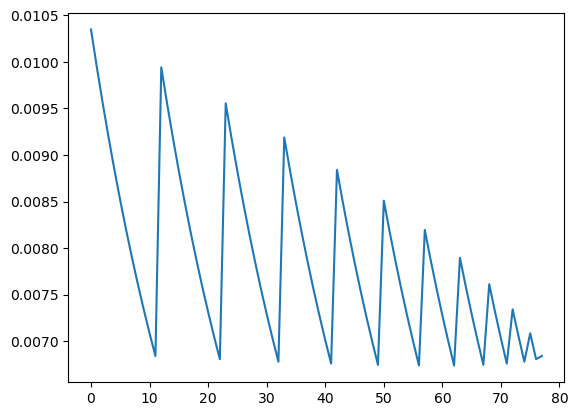

In [5]:
plt.plot(covdf.iloc[100])

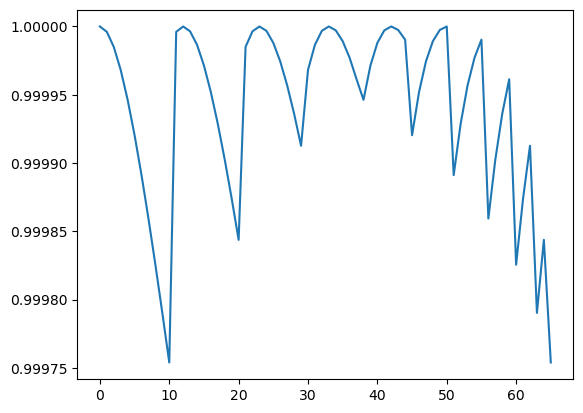

In [6]:
plt.plot(cordf.iloc[100])

In [266]:
#creating the model
cormodel = keras.Sequential(
    [
    keras.layers.Dense(66, activation='relu', input_dim=66, kernel_initializer="glorot_uniform"),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1500, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(5)
    ]
)


covmodel = keras.Sequential(
    [
    keras.layers.Dense(78, activation='relu', input_dim=78, kernel_initializer="glorot_uniform"),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1500, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(5)
    ]
)

traincorx = cordf.iloc[:8000]
traincovx = covdf.iloc[:8000]
trainy = params.iloc[:8000]
testcorx = cordf.iloc[8000:]
testcovx = covdf.iloc[8000:]
testy = params.iloc[8000:]

In [287]:
cormodel.compile(loss='mse', optimizer='adam')
acor = cormodel.fit(traincorx, trainy, epochs=100, batch_size=1000, validation_split=0.0, validation_data=(testcorx, testy), verbose=1)

Epoch 1/100
8/8 [==============================] - 2s 166ms/step - loss: 0.0679 - val_loss: 0.0674
Epoch 2/100
8/8 [==============================] - 1s 138ms/step - loss: 0.0678 - val_loss: 0.0674
Epoch 3/100
8/8 [==============================] - 1s 140ms/step - loss: 0.0676 - val_loss: 0.0671
Epoch 4/100
8/8 [==============================] - 1s 137ms/step - loss: 0.0685 - val_loss: 0.0677
Epoch 5/100
8/8 [==============================] - 1s 160ms/step - loss: 0.0680 - val_loss: 0.0676
Epoch 6/100
8/8 [==============================] - 1s 155ms/step - loss: 0.0678 - val_loss: 0.0674
Epoch 7/100
8/8 [==============================] - 1s 165ms/step - loss: 0.0677 - val_loss: 0.0674
Epoch 8/100
8/8 [==============================] - 1s 146ms/step - loss: 0.0677 - val_loss: 0.0674
Epoch 9/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0676 - val_loss: 0.0673
Epoch 10/100
8/8 [==============================] - 1s 142ms/step - loss: 0.0675 - val_loss: 0.0674
Epoch 11/

In [292]:
covmodel.compile(loss='mse', optimizer='adam')
acov = covmodel.fit(traincovx, trainy, epochs=100, batch_size=1000, validation_split=0.0, validation_data=(testcovx, testy),verbose=1)

Epoch 1/100
8/8 [==============================] - 2s 151ms/step - loss: 0.0356 - val_loss: 0.0336
Epoch 2/100
8/8 [==============================] - 1s 149ms/step - loss: 0.0340 - val_loss: 0.0328
Epoch 3/100
8/8 [==============================] - 1s 140ms/step - loss: 0.0337 - val_loss: 0.0327
Epoch 4/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0336 - val_loss: 0.0329
Epoch 5/100
8/8 [==============================] - 1s 139ms/step - loss: 0.0334 - val_loss: 0.0323
Epoch 6/100
8/8 [==============================] - 1s 138ms/step - loss: 0.0328 - val_loss: 0.0322
Epoch 7/100
8/8 [==============================] - 1s 156ms/step - loss: 0.0327 - val_loss: 0.0316
Epoch 8/100
8/8 [==============================] - 1s 139ms/step - loss: 0.0323 - val_loss: 0.0316
Epoch 9/100
8/8 [==============================] - 1s 138ms/step - loss: 0.0330 - val_loss: 0.0328
Epoch 10/100
8/8 [==============================] - 1s 139ms/step - loss: 0.0338 - val_loss: 0.0325
Epoch 11/

In [269]:
test = covmodel.predict(np.array(covdf.iloc[100]).reshape(1, 78))

1/1 [==============================] - 0s 78ms/step


In [270]:
print("actual : ", params.iloc[100].tolist())
print("predicted : ",test)

actual :  [0.10644834645948564, 0.10653517826938626, 0.09294479870907814, 0.0395003954773223, -0.7231006766300845]
predicted :  [[ 0.0802795   0.09580843  0.07188617  0.07692587 -0.5085562 ]]


In [271]:
covpredict = covmodel.predict(np.array(testcovx))
corpredict = cormodel.predict(np.array(testcorx))

63/63 [==============================] - 0s 4ms/step


In [272]:
#computing rmse for cov

rmse = [0, 0, 0, 0, 0]
for k in range(len(covpredict)):
    for i in range(5):
        rmse[i]+= (covpredict[k][i] - testy.iloc[k].tolist()[i])**2
for i in range(5):
    rmse[i] = np.sqrt(rmse[i]*1/2000)
rmse

[0.02338426554463655,
 0.02837601442792394,
 0.03316759267145866,
 0.032580090154297664,
 0.3922148982854599]

In [273]:
#computing rmse for cor

rmser = [0, 0, 0, 0, 0]
for k in range(len(covpredict)):
    for i in range(5):
        rmser[i]+= (corpredict[k][i] - testy.iloc[k].tolist()[i])**2
for i in range(5):
    rmser[i] = np.sqrt(rmser[i]*1/2000)
rmser

[0.027815965754884063,
 0.03457185606774164,
 0.03666703601357679,
 0.036357190381860735,
 0.5764567192302603]

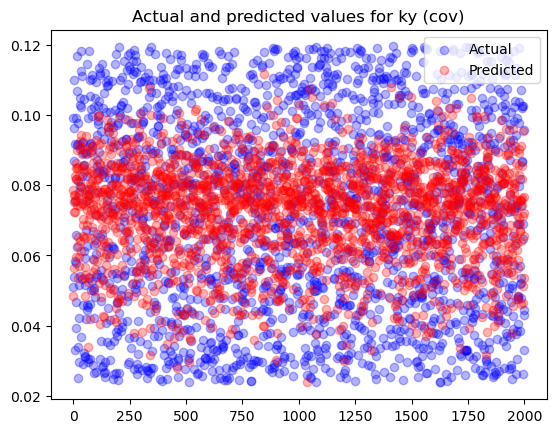

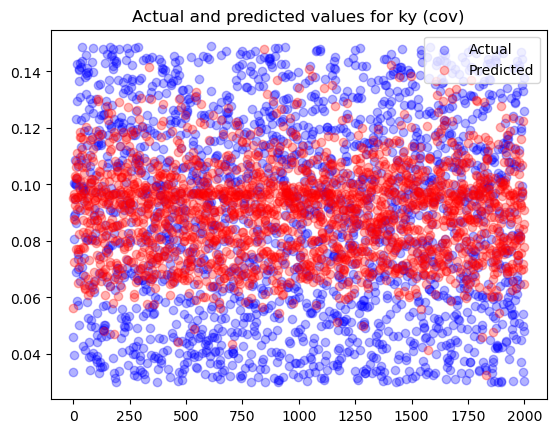

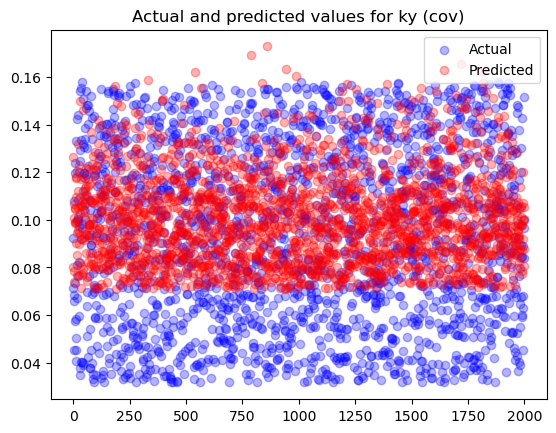

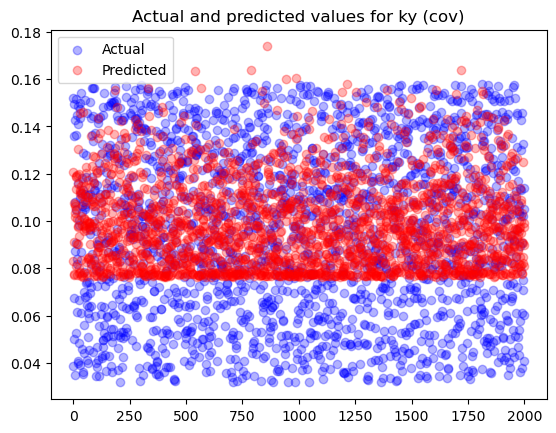

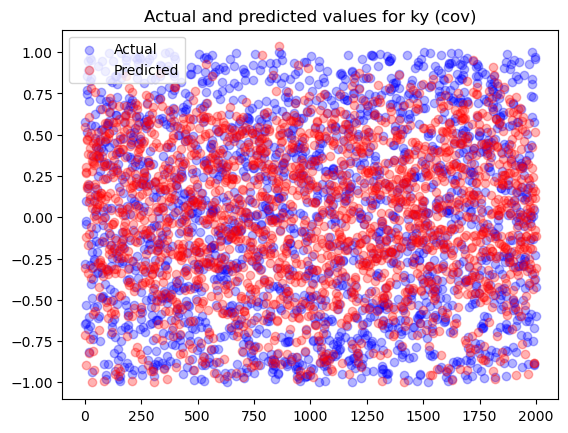

In [274]:
for i in range(5):
    _, ax2 = plt.subplots()
    ax2.scatter(x = range(0, 2000), y=[testy.iloc[k].tolist()[i] for k in range(2000)], c = 'blue', label = 'Actual', alpha = 0.3)
    ax2.scatter(x = range(0, 2000), y=[covpredict[k][i] for k in range(2000)], c = 'red', label = 'Predicted', alpha = 0.3)
    plt.title('Actual and predicted values for ky (cov)')
    plt.legend()
    plt.show()
    plt.show()

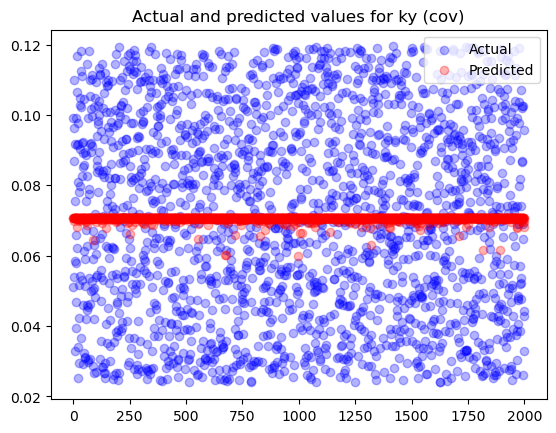

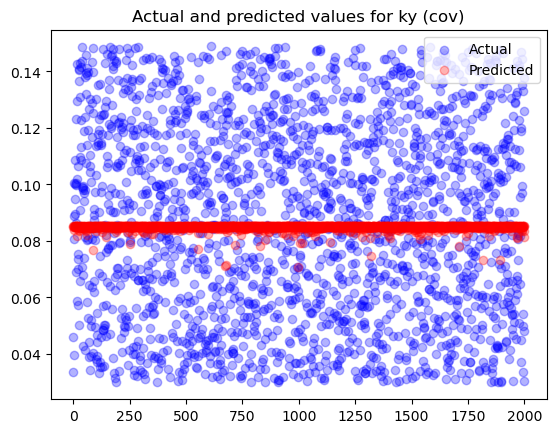

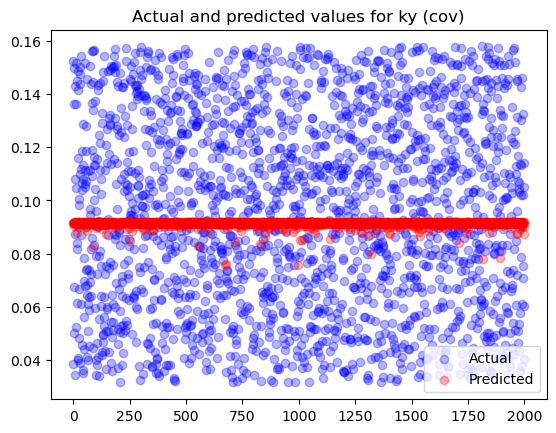

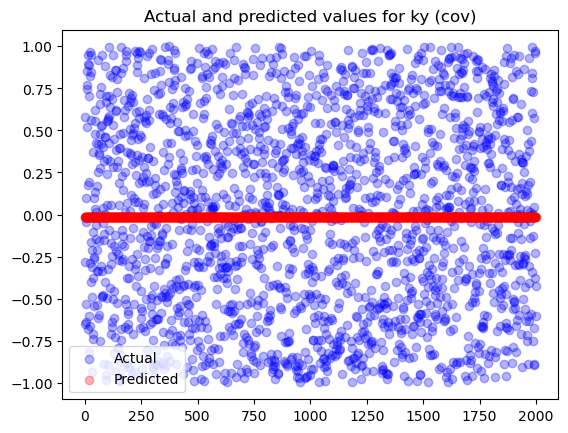

In [275]:
for i in range(5):
    _, ax2 = plt.subplots()
    ax2.scatter(x = range(0, 2000), y=[testy.iloc[k].tolist()[i] for k in range(2000)], c = 'blue', label = 'Actual', alpha = 0.3)
    ax2.scatter(x = range(0, 2000), y=[corpredict[k][i] for k in range(2000)], c = 'red', label = 'Predicted', alpha = 0.3)
    plt.title('Actual and predicted values for ky (cov)')
    plt.legend()
    plt.show()

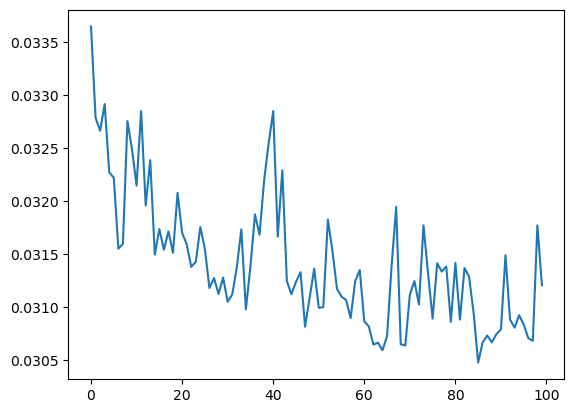

In [318]:
plt.plot(acov.history['val_loss'])

In [293]:
a = cormodel.evaluate(np.array(testcorx), testy)

63/63 [==============================] - 1s 4ms/step - loss: 0.0674


In [8]:
zcs = np.load('Values_HW2F_ZC.npy')

Text(0.5, 1.0, 'zc curve')

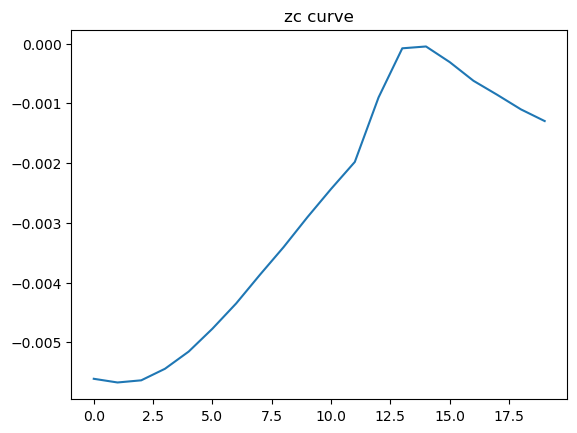

In [9]:
plt.plot([zcs[1000][0][t] for t in range(8, 28)])
plt.title('zc curve')

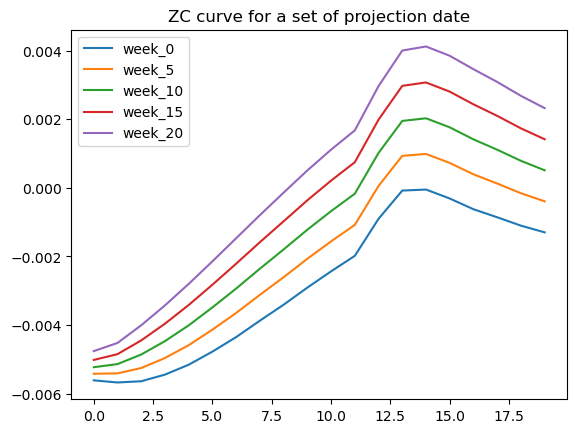

In [10]:
for i in range(5):
    plt.title('ZC curve for a set of projection date')
    plt.plot([zcs[42][i*5][t] for t in range(8, 28)], label=f'week_{i*5}')
    plt.legend()

In [19]:
paramszc = pd.read_pickle('Labels_HW2F.pkl')
np.array(paramszc)
ytrain = paramszc[:8000]
ytest = paramszc[8000:]
xtrain = zcs[:8000]
xtest = zcs[8000:]

In [48]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=1, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=(106, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(7, 7)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(5)
])
cnn.compile(loss='mse', optimizer='adam')

In [49]:
cnn.compile(loss='mse', optimizer='adam')
acnn = cnn.fit(xtrain, ytrain, epochs=10, batch_size=1000, validation_split=0.0, verbose=1, validation_data=(xtest, ytest))

Epoch 1/10
8/8 [==============================] - 1s 83ms/step - loss: 0.0730 - val_loss: 0.0675
Epoch 2/10
8/8 [==============================] - 1s 69ms/step - loss: 0.0704 - val_loss: 0.0661
Epoch 3/10
8/8 [==============================] - 1s 64ms/step - loss: 0.0695 - val_loss: 0.0656
Epoch 4/10
8/8 [==============================] - 1s 84ms/step - loss: 0.0692 - val_loss: 0.0655
Epoch 5/10
8/8 [==============================] - 0s 63ms/step - loss: 0.0692 - val_loss: 0.0655
Epoch 6/10
8/8 [==============================] - 1s 68ms/step - loss: 0.0691 - val_loss: 0.0655
Epoch 7/10
8/8 [==============================] - 1s 67ms/step - loss: 0.0691 - val_loss: 0.0655
Epoch 8/10
8/8 [==============================] - 1s 66ms/step - loss: 0.0691 - val_loss: 0.0655
Epoch 9/10
8/8 [==============================] - 1s 69ms/step - loss: 0.0691 - val_loss: 0.0655
Epoch 10/10
8/8 [==============================] - 1s 64ms/step - loss: 0.0691 - val_loss: 0.0655


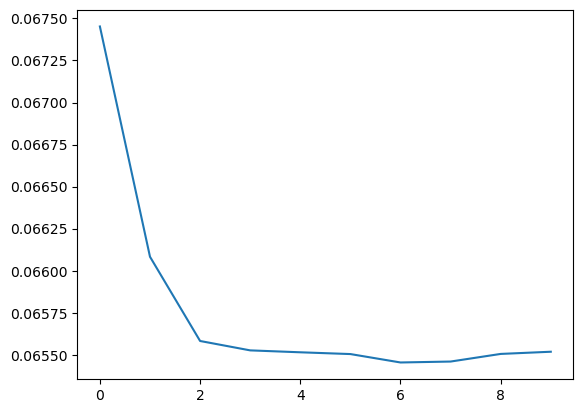

In [50]:
plt.plot(acnn.history['val_loss'])

In [51]:
pred = cnn.predict(xtest)
pred.shape

63/63 [==============================] - 0s 1ms/step


(2000, 5)

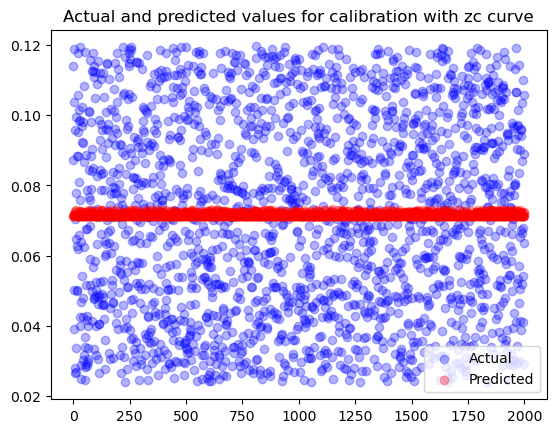

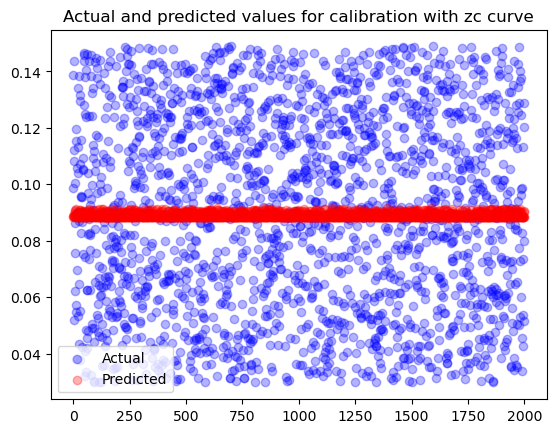

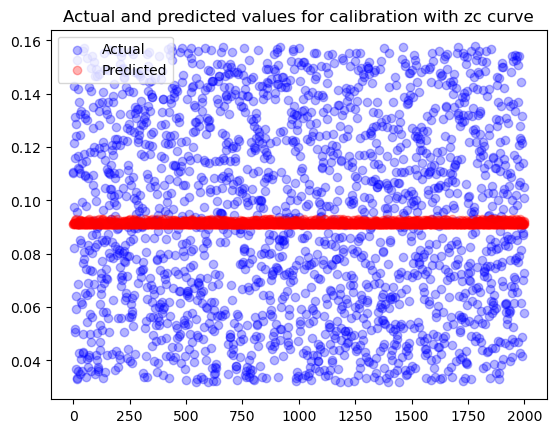

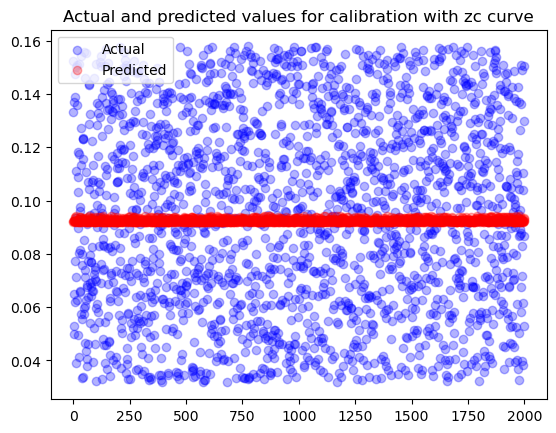

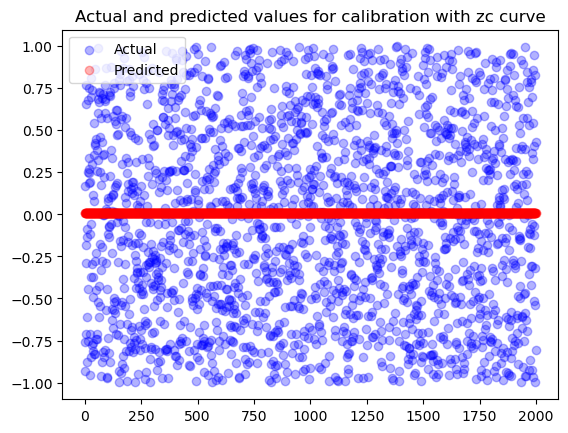

In [52]:
for i in range(5):
    _, ax2 = plt.subplots()
    ax2.scatter(x = range(0, 2000), y=[ytest.iloc[k].tolist()[i] for k in range(2000)], c = 'blue', label = 'Actual', alpha = 0.3)
    ax2.scatter(x = range(0, 2000), y=[pred[k][i] for k in range(2000)], c = 'red', label = 'Predicted', alpha = 0.3)
    plt.title('Actual and predicted values for calibration with zc curve')
    plt.legend()
    plt.show()

In [45]:
#computing rmse for cov

rmse = [0, 0, 0, 0, 0]
for k in range(len(pred)):
    for i in range(5):
        rmse[i]+= (pred[k][i] - ytest.iloc[k].tolist()[i])**2
for i in range(5):
    rmse[i] = np.sqrt(rmse[i]*1/2000)
rmse

[0.02766625970679688,
 0.03426488971124193,
 0.03667050930212148,
 0.036321355778606734,
 0.5680877095184271]